In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline                    


In [264]:
df = pd.read_csv('attacks.csv', encoding='Windows-1252' )

In [265]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [266]:
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [267]:
df = df[['Case Number','Sex ', 'Country', 'Area', 'Species ', 'Activity', 'Injury', 'Fatal (Y/N)']]

In [268]:
df.head(5)

,Case Number,Sex,Country,Area,Species,Activity,Injury,Fatal (Y/N)
0,2018.06.25,F,USA,California,White shark,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,F,USA,Georgia,NaN,Standing,Minor injury to left thigh,N
2,2018.06.09,M,USA,Hawaii,NaN,Surfing,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,M,AUSTRALIA,New South Wales,2 m shark,Surfing,Minor injury to lower leg,N
4,2018.06.04,M,MEXICO,Colima,"Tiger shark, 3m",Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [269]:
df.duplicated().sum() #total de datos duplicados en mi dataframe

19419

In [270]:
df['Sex '].duplicated().sum()

25716

In [271]:
df.isnull() #los valores True significan que los datos d¡son nan

,Case Number,Sex,Country,Area,Species,Activity,Injury,Fatal (Y/N)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
25718,True,True,True,True,True,True,True,True
25719,True,True,True,True,True,True,True,True
25720,True,True,True,True,True,True,True,True
25721,True,True,True,True,True,True,True,True


In [272]:
df['Species '].value_counts() #numero de tiburones por especie


White shark                                                          163
Shark involvement prior to death was not confirmed                   105
Invalid                                                              102
Shark involvement not confirmed                                       88
Tiger shark                                                           73
                                                                    ... 
Hammerhead shark.                                                      1
Doubtful / Unconfirmed attack / Unable to verify in local records      1
Wobbegong shark, 60cm                                                  1
Oceanic whitetip shark x 2                                             1
Salmon shark suspected, but unlikely                                   1
Name: Species , Length: 1549, dtype: int64

In [273]:
df[(df['Species '].isnull())]['Area'].value_counts()

Florida                         477
New South Wales                 193
Queensland                      151
Hawaii                          106
South Carolina                   73
                               ... 
Lake Nicaragua (fresh water)      1
Zadar County                      1
Leyte Island                      1
Manfredonia                       1
Kochi Prefecture                  1
Name: Area, Length: 526, dtype: int64

In [274]:
df['Injury'].value_counts()
#df[(df['Activity'].isnull())]['Injury'].value_counts()

FATAL                                                                                                 802
Survived                                                                                               97
Foot bitten                                                                                            87
No injury                                                                                              82
Leg bitten                                                                                             72
                                                                                                     ... 
No injury to occupants. Shark charged boat, tore off rudder & tossed it air, then swam off with it      1
Left leg severed below knee                                                                             1
Right forearm injured, mid-humeral amputation                                                           1
Right thigh & calf lacerated                  

In [275]:
value_species = df['Species '].value_counts()

In [276]:
value_species.head(10)

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Shark involvement prior to death unconfirmed           68
Bull shark                                             52
6' shark                                               40
4' shark                                               40
1.8 m [6'] shark                                       35
Name: Species , dtype: int64

In [277]:
df = df[df['Species '].isin(['White shark', 'Tiger shark', 'Bull shark'])]

In [304]:
#df['Case Number']
#df['Species '].unique()
df.Area.unique()

array(['California', 'Hawaii', 'Florida', 'North Carolina', 'Alabama',
       'Oregon', 'Texas', 'Washington', 'South Carolina', 'Mississippi'],
      dtype=object)

In [279]:
df.head(5)

,Case Number,Sex,Country,Area,Species,Activity,Injury,Fatal (Y/N)
0,2018.06.25,F,USA,California,White shark,Paddling,"No injury to occupant, outrigger canoe and pad...",N
6,2018.06.03.a,M,BRAZIL,Pernambuco,Tiger shark,Swimming,FATAL,Y
18,2018.04.28.b,M,COSTA RICA,Cocos Island,Tiger shark,Scuba diving,"No injury, shark bit scuba gear",N
23,2018.04.23,M,MALDIVES,Alifu Alifu Atoll,Tiger shark,Fishing,5-inch cut to hand,N
30,2018.04.14,M,BAHAMAS,New Providence,Tiger shark,Surfing,No Injury. Shark swam away with the surf board,N


In [280]:
df = df[df['Country'] == 'USA']

In [281]:
df

,Case Number,Sex,Country,Area,Species,Activity,Injury,Fatal (Y/N)
0,2018.06.25,F,USA,California,White shark,Paddling,"No injury to occupant, outrigger canoe and pad...",N
53,2017.12.31,F,USA,Hawaii,Tiger shark,Surfing,Severe lacerations to left thigh & knee,N
120,2017.07.11,M,USA,California,White shark,Kayaking,"No injury, kayak bitten",N
140,2017.05.28,M,USA,Florida,Tiger shark,Feeding sharks,Lacerations to right arm,N
169,2017.03.18,M,USA,California,White shark,Kayaking,"No injury, kayak bitten",N
...,...,...,...,...,...,...,...,...
5041,1930.07.11,M,USA,Florida,Tiger shark,Swimming,Arm lacerated from shoulder to wrist,N
5598,1898.00.00.f,M,USA,South Carolina,White shark,Fishing (Seining),Lacerations to left hand,N
5836,1879.00.00,M,USA,Mississippi,Tiger shark,Floating with life buoy after pilot launch cap...,FATAL,Y
6007,1853.09.28,M,USA,North Carolina,White shark,Commercial Salvage Diving,No injury. Copper breastplate & harness bitten,N


<AxesSubplot:xlabel='Species ', ylabel='count'>

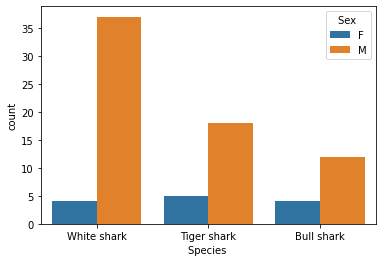

In [282]:
sns.countplot(x=df['Species '], hue=df['Sex '])

In [ ]:
agrupacion.groupby(['Species ', 'Area']).count()

In [287]:
df1.Area.value_counts()#########################

California        31
Oregon             5
North Carolina     3
South Carolina     2
Florida            1
Washington         1
Name: Area, dtype: int64

In [288]:
df1.sort_values('Country', ascending=True)

,Case Number,Type,Country,Area,Species,Activity,Injury,Fatal (Y/N)
0,2018.06.25,Boating,USA,California,White shark,Paddling,"No injury to occupant, outrigger canoe and pad...",N
1638,2004.09.20,Unprovoked,USA,Oregon,White shark,Surfing,Leg bitten,N
2088,1999.11.15,Unprovoked,USA,California,White shark,Surfing (sitting on his board),"No injury, board bitten",N
2099,1999.09.18,Unprovoked,USA,California,White shark,Kayaking,"No injury, but kayak scraped & dented",N
2504,1993.03.12,Unprovoked,USA,California,White shark,Free diving & spearfishing (ascending),"No injury, swim fin bitten",N
2623,1990.09.08,Unprovoked,USA,California,White shark,"Free diving / spearfishing, from paddleboard &...","Shark rammed & overturned paddleboard, knockin...",N
2686,1989.04.12,Unprovoked,USA,Washington,White shark,Surfing (lying prone on his board),Forearm bitten,N
2737,1988.04.24,Unprovoked,USA,California,White shark,Surfing,No Injury,N
2921,1983.08.20.b,Unprovoked,USA,Oregon,White shark,Surfing,"No injury, board bitten",N
1536,2005.10.21,Unprovoked,USA,California,White shark,Surfing,No injury,N


<AxesSubplot:xlabel='Area', ylabel='count'>

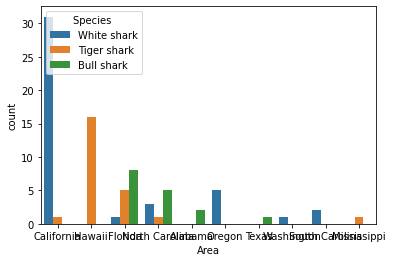

In [298]:

sns.countplot(x=df.Area, hue=df['Species '])


<AxesSubplot:xlabel='Area', ylabel='Count'>

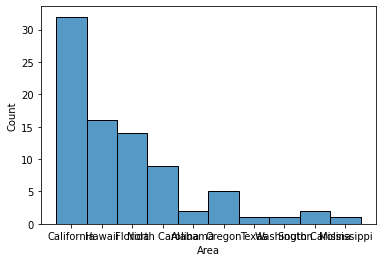

In [292]:
sns.histplot(x=df.Area )

<AxesSubplot:xlabel='Country', ylabel='Count'>

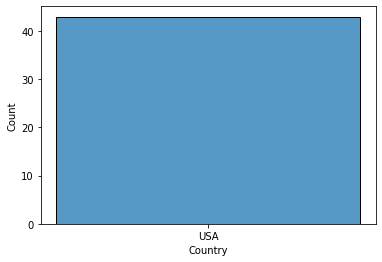

In [290]:
sns.histplot(x=df1[df1['Species '] == "White shark"].Country)